In [1]:
# Individual Planning Project; Parleen Uppal (70438452) 

In [2]:
#libraries needed for data wrangling

library(tidyverse)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [9]:
#loading the dataset that will be used

players <- read_csv("players (1).csv")
players

#using the function glimpse to get a summary of the dataframe

glimpse(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


In [ ]:
# 1. DATA DESCRIPTION

This project uses the **players.csv** dataset, which contains information about players’ demographics, self-reported experience levels, behavior patterns, and newsletter subscription status. This dataset is appropriate for studying how player engagement and experience relate to marketing opt-in behaviour.

The dataset contains **196 observations** and **7 variables**.

---

## Variables

| Variable | Type | Meaning |
|----------|------|---------|
| **experience** | categorical | Self-reported experience tier (e.g., “Novice”, “Pro”). |
| **subscribe** | logical / categorical | Whether the player subscribed to the newsletter. This is the **response** variable. |
| **hashedEmail** | character | Hashed player identifier for privacy. Not used in modelling. |
| **played_hours** | numeric | Total number of hours the player has spent in the game (behavioural metric). |
| **name** | character | Real player name. |
| **gender** | categorical | Self-reported

## Potential Issues

- Right-skewed distribution in `played_hours` (many low-hour players).
- Experience levels may be unevenly distributed across the dataset.
- Possible missing or unrealistic age values (consider this for the self-reported values).
- Users could have signed up without providing hours.
- Class imbalance: typically more non-subscribers than subscribers.

Overall, the data support predictive modelling and interaction analysis between experience level and behaviour.

In [ ]:
# 2. QUESTIONS

## My Chosen Broad Question

**What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?**

## My Specific Question

**Does the relationship between hours played and newsletter subscription differ across experience levels in the players.csv dataset?**

---

### Why This Question Works

- `subscribe` is a binary outcome, which makes it ideal for logistic regression.
- We use both:
  - A behavioural/quantitative predictor (`played_hours`)
  - A categorical player-type predictor (`experience`)
- The key focus is on the **interaction term**:  
  `played_hours * experience`

This allows for the testing of whether the effect of playtime on subscription changes depending on a player's experience category (e.g., Pro vs Novice).

---

### How the Data Supports This Question

- `played_hours` provides a continuous measure of engagement.
- `experience` describes qualitative differences in player type.
- `subscribe` allows for binary modelling.
- Together they support a meaningful behavioural + categorical interaction analysis.

In [12]:
# minimal data wrangling
# keep only modelling-relevant variables

players_tidy <- players |>
  select(experience, subscribe, played_hours, Age, gender) |>
  mutate(
    subscribe = ifelse(subscribe, "yes", "no"),
    subscribe = as.factor(subscribe),
    experience = as.factor(experience)
  )
players_tidy
glimpse(players_tidy)

experience,subscribe,played_hours,Age,gender
<fct>,<fct>,<dbl>,<dbl>,<chr>
Pro,yes,30.3,9,Male
Veteran,yes,3.8,17,Male
Veteran,no,0.0,17,Male
⋮,⋮,⋮,⋮,⋮
Amateur,no,0.0,57,Prefer not to say
Amateur,no,2.3,17,Male
Pro,yes,0.2,NA,Other


Rows: 196
Columns: 5
$ experience   <fct> Pro, Veteran, Veteran, Amateur, Regular, Amateur, Regular…
$ subscribe    <fct> yes, yes, no, yes, yes, yes, yes, no, yes, yes, yes, yes,…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…


In [ ]:
# 3. EXPLORATORY DATA ANALYSIS & VISUALIZATION

This section of the planning report demonstrates:

- that the dataset loads correctly in R,
- that the data can be minimally wrangled into tidy format,
- that the required summary statistics can be computed,
- and that high-quality exploratory plots can be generated to understand relationships.

No modelling is performed here.

---

## Mean Values for Quantitative Variables

We compute the required summary table for all quantitative variables in players.csv.


In [16]:
# a mean table

players_means <- players_tidy %>%
  summarise(
    mean_played_hours = round(mean(played_hours, na.rm = TRUE), 2),
    mean_age = round(mean(Age, na.rm = TRUE), 2)
  )
players_means

mean_played_hours,mean_age
<dbl>,<dbl>
5.85,21.14


Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


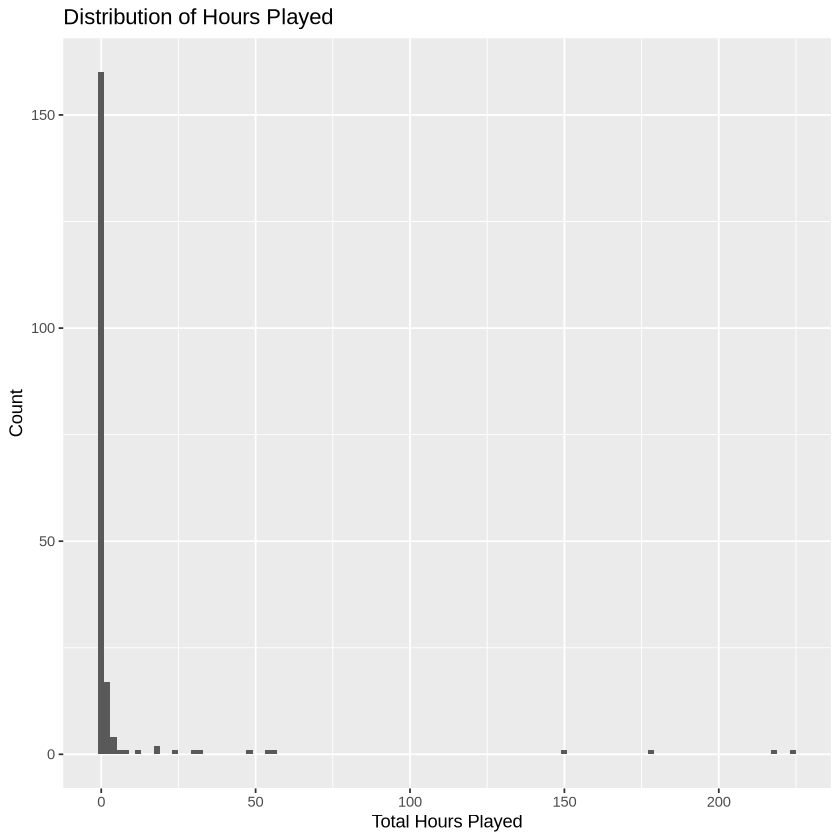

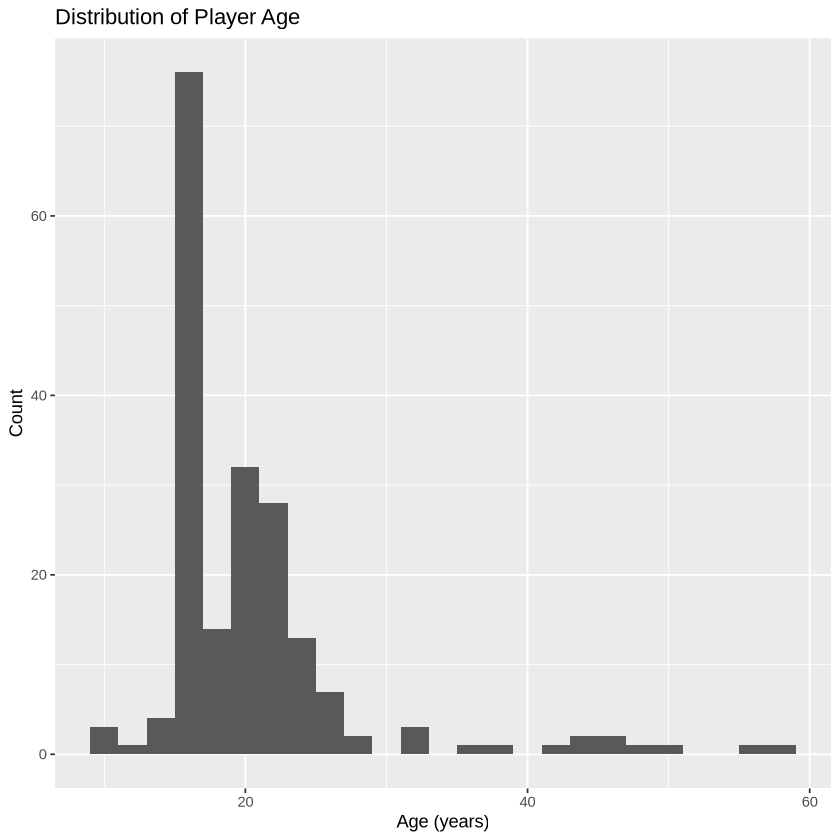

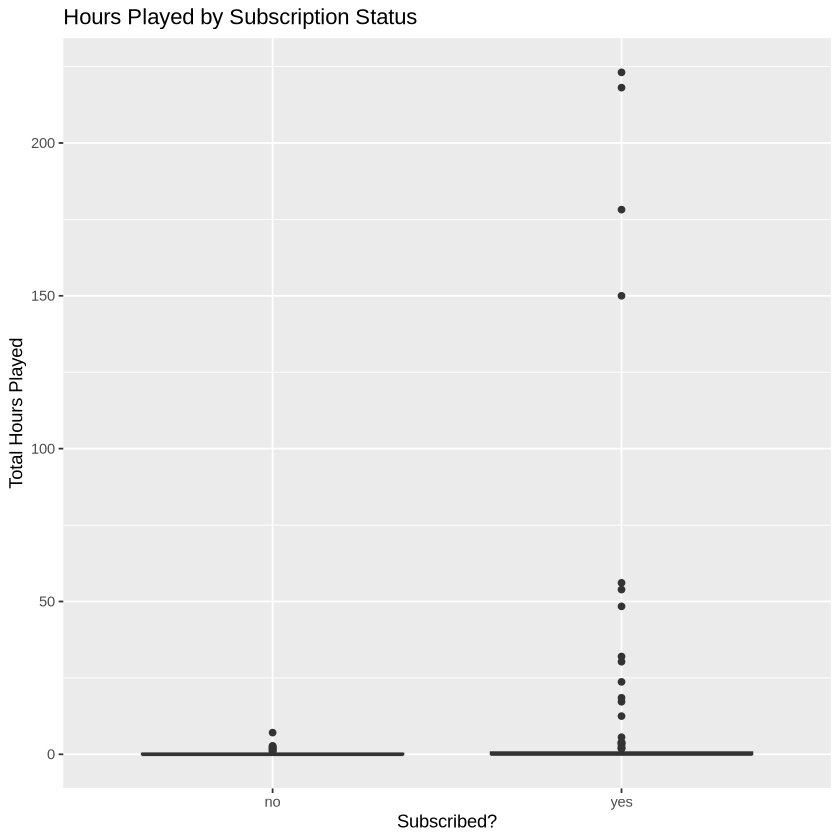

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


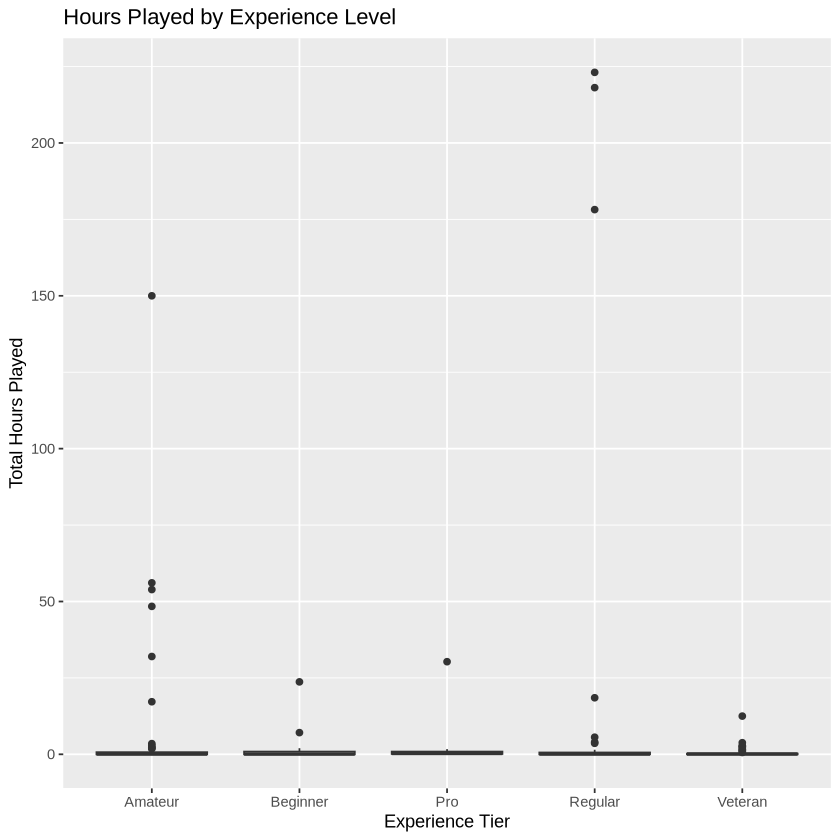

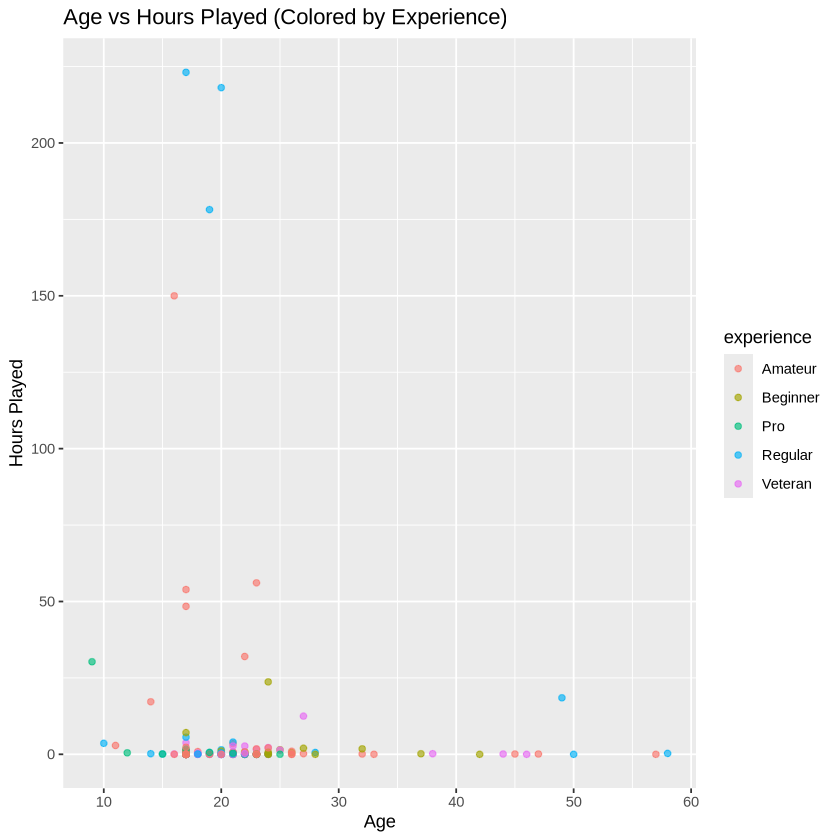

In [14]:
# histogram: hours played

ggplot(players_tidy, aes(x = played_hours)) +
  geom_histogram(binwidth = 2) +
  labs(
    title = "Distribution of Hours Played",
    x = "Total Hours Played",
    y = "Count"
  )

# histogram: age
ggplot(players_tidy, aes(x = Age)) +
  geom_histogram(binwidth = 2) +
  labs(
    title = "Distribution of Player Age",
    x = "Age (years)",
    y = "Count"
  )

# boxplot: hours played by subscription status
ggplot(players_tidy, aes(x = subscribe, y = played_hours)) +
  geom_boxplot() +
  labs(
    title = "Hours Played by Subscription Status",
    x = "Subscribed?",
    y = "Total Hours Played"
  )

# boxplot: hours played by experience eategory
ggplot(players_tidy, aes(x = experience, y = played_hours)) +
  geom_boxplot() +
  labs(
    title = "Hours Played by Experience Level",
    x = "Experience Tier",
    y = "Total Hours Played"
  )

# scatterplot: hours vs age, colored by experience
ggplot(players_tidy, aes(x = Age, y = played_hours, color = experience)) +
  geom_point(alpha = 0.65) +
  labs(
    title = "Age vs Hours Played (Colored by Experience)",
    x = "Age",
    y = "Hours Played"
  )

In [ ]:
## relevant insights from EDA 

- **played_hours is strongly right-skewed**, with many low-hour players and a few extremely high-hour players.
- **Experience groups show different distributions of playtime**:
  - Pros and Veterans tend to have higher playtime.
  - Novice and Casual players have lower playtime.
- Subscribers show **higher median hours played**.
- Experience and playtime appear to interact:
  - The effect of hours played on subscription may be stronger for experienced players.
- Age shows relatively small variation compared to playtime, suggesting weaker predictive power.

These findings suggest that experience level may influence how hours played affects the likelihood of subscribing to the newsletter. In other words, the relationship between playtime and subscription is not uniform across all players, which supports investigating an interaction between played_hours and experience in the model.


In [ ]:
# 4. METHODS AND PLAN

- **Purpose**: Predict subscription status (yes/no) using hours played and experience level. Includes an interaction to see if playtime affects subscription differently for different experience groups.

- **Key assumption**: The model assumes that the predictors affect the likelihood of subscribing in a smooth, linear way, and that each player in the dataset is an independent case.

- **Potential limitations include**: 
  - Outliers in hours played could affect results.
  - Some experience groups have fewer players, which may affect the interaction estimate.
  - Only captures linear interactions between predictors.

- **Model evaluation considerations**: 
  - Split data into training (70%) and testing (30%) sets. The training set is used to fit the model, and the testing set is used to check how well the model predicts new data.
  - Use 5-fold cross-validation on the training data to see how well the model performs across different subsets of the data. This helps avoid overfitting and ensures the model generalizes well.
  - Compare models based on overall prediction accuracy to choose the best model for the data.

- **Data processing considerations**:
  - Convert categorical variables (like experience) into factors so the model treats them correctly.
  - Inspect `played_hours` for possible transformations to reduce skew and improve model performance.
  - Check for missing or unusual values in the dataset before fitting the model.

In [ ]:
# 5. GITHUB REPOSITORY LINK

